<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/M%C3%A8tode_expl%C3%ADcit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partim de la EDP:


$c_vρ\frac{∂T}{∂t}=∇⋅(κ{\vec\nabla T})+P_{ext}$

Després de normalitzar i reduïr els paràmetres al mínim obtenim:

$\frac{\partial\tilde{T}}{\partial\tilde{t}}=\frac{\partial^2\tilde{T}}{\partial\tilde{x}^2}+1$



Discretitzem via Euler explícit amb la derivada per la dreta:

$\frac{T_{i+1}^{(n)}-T_i^{(n)}}{Δt}=1+\frac{T_i^{(n+1)}-2T_i^{(n)}+T_i^{(n-1)}}{(Δx)^2}$

Aïllem $T_{i+1}^{(n)}$:

$T_{i+1}^{(n)}=Δt+\alpha T_{i}^{(n-1)}+βT_{i}^{(n)} + α T_{i}^{(n+1)}$

On: $\ α=\frac{Δt}{\Delta x^2},\ β=1-\frac{2\Delta t}{\Delta x^2}$

Això es pot escriure en forma matricial i calcular tots els punts espaials de la malla a temps $i+1$ a partir dels de i. Ja que tenim tots els punts de $i=0$ de les condicions de contorn

I les condicions de contorn són:

*   $T(0,x)=36,5\ ℃$
*   $\frac{\partial T(t,\ 0)}{\partial t}=\frac{\partial T(t,\ 2\ cm)}{\partial t}=0$



In [72]:
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
import matplotlib.patches as pt

#Dades de l'enunciat

C_v= 3686
rho= 1081
kappa= 0.56
sigma= 0.472
volts= 40

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

N= 101   # Mallat espaial

#X i la seva normalització

x_0= 0.02
x_f= 0.02/x_0
x_i= 0

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Difusivitat càlcul

alpha_var= kappa/(C_v*rho)
#print("La difusivitat dona:", alpha_var)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#t i la seva normalització

t_i= 0
t_0= x_0**2/alpha_var
#print("t_0 és:", t_0)
t_f= 0.025
#print("t_f és:", t_f)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Càlcul de la potència externa

P_ext= volts**2*sigma/(2*(x_0)**2)
#print(P_ext)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#T i la seva discretització

T_0= P_ext/(C_v*rho)*t_0
#print("T_0 val:", T_0)
T_init= (36.5+273.15)/T_0   #Temperatura inicial en Kelvin
#print("T_init:",T_init)


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#Variacions de les variables (els tres delta t corresponen als 3 de l'enunciat)

dx= x_f/(N-1)
#print("El dx és:", dx)

dt_1= 0.51*dx**2 # disc temps 1
#print("dt_1 és:", dt_1)

dt_2= 0.49*dx**2 # disc temps 2
dt_3= 0.25*dx**2  # disc temps 3

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Bloc del càlcul amb Euler explícit:

In [73]:
#EULER CÀLCUL
def Euler_explícit (T_i, t_f, dt, dx):
  T_i= np.ones((N,1))*T_i  #Vector columna de les T_i per cada n (punt de l'espai)
  alpha = dt / (dx**2)
  beta = 1 - 2 * alpha

  #Primera columna
  col1 = np.zeros(N)
  col1[0] = beta
  if N > 1:
      col1[1] = alpha

  #Primera fila
  fila1 = np.zeros(N)
  fila1[0] = beta
  if N > 1:
      fila1[1] = alpha

  matriu = toeplitz(col1, fila1)

  #Modifiquem la matriu per tal que els termes N i 0 no variin d'acord amb les condicions de contorn
  matriu[0, :] = 0
  matriu[0, 0] = 1
  matriu[-1, :] = 0
  matriu[-1, -1] = 1

  #Creem un nou array amb els mateixos valors que a l'inici per començar a iterar
  T_iter = np.copy(T_i)
  t_i = 0

  #Vector dels dt que queden sumant
  vec_dt = np.ones((N, 1)) * dt
  vec_dt[0, 0] = 0  #Cond. de contorn
  vec_dt[-1, 0] = 0


  while t_i < t_f:


    #Següent iteració
    T_iter = np.matmul(matriu, T_iter) + vec_dt

    #Ens asssegurem que això segueixi seguint les cc
    T_iter[0,0] = T_i[0,0]
    T_iter[-1,0] = T_i[-1,0]

    t_i += dt

  #Tornem a Celsius
  return T_iter * T_0 - 273.15


In [74]:
#Euler explícit: retake (experiment xungo)

def Euler_explícit2(T_i, t_f, dt, dx):
  T_i= np.array([T_i]*N)  #Vector columna de les T_i per cada n (punt de l'espai)
  alpha = dt / (dx**2)
  beta = 1 - 2 * alpha
  t_i= 0

  while t_i < t_f:
    for i in range(1, len(T_i)-1):
      T_i[i]= T_i[i-1]*alpha + T_i[i+1]*alpha + T_i[i]*beta + dt

    t_i += dt

  return T_i*T_0-273.15

ys_2= np.squeeze(np.asarray(Euler_explícit(T_init, t_f, dt_2, dx)))
ys_2bis= Euler_explícit2(T_init, t_f, dt_2, dx)

print(np.abs(ys_2-ys_2bis))




[ 0.          0.44935975  0.89965505  1.35018382  1.8002461   2.249147
  2.69619944  3.14072691  3.58206609  4.01956929  4.45260688  4.8805694
  5.3028696   5.71894428  6.12825583  6.53029371  6.92457555  7.31064813
  7.68808809  8.05650239  8.41552856  8.76483472  9.10411939  9.43311102
  9.75156739 10.05927478 10.35604693 10.64172388 10.91617061 11.17927556
 11.43094905 11.67112154 11.89974182 12.1167752  12.32220155 12.51601336
 12.69821378 12.8688147  13.02783477 13.17529755 13.31122967 13.43565909
 13.54861341 13.65011832 13.74019618 13.81886467 13.88613563 13.94201405
 13.98649718 14.01957383 14.04122389 14.0514179  14.05011692 14.03727254
 14.01282705 13.97671384 13.9288579  13.86917659 13.79758049 13.71397449
 13.61825897 13.51033119 13.39008675 13.2574212  13.1122318  12.9544193
 12.78388988 12.60055709 12.40434388 12.19518465 11.97302728 11.73783523
 11.48958954 11.2282908  10.9539611  10.66664584 10.36641546 10.05336707
  9.72762591  9.38934666  9.03871459  8.67594654  8.301

Plots:

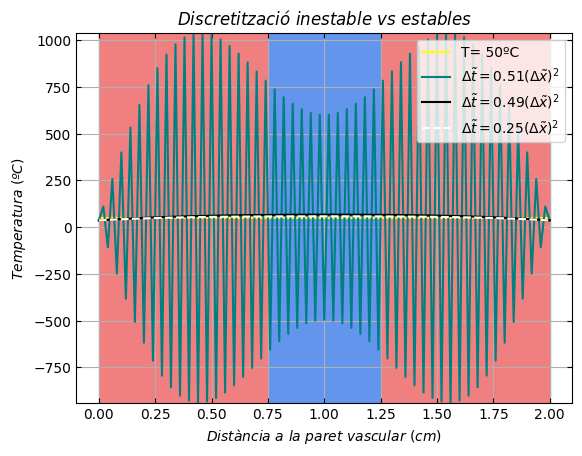

In [75]:
#Creació de la llista que farà d'eix de les x
dx_llista= np.linspace(0, 2, 101)

#Calculem per cada discretització i ho guardem a una variable
ys_1= Euler_explícit(T_init, t_f, dt_1, dx)
ys_2= Euler_explícit2(T_init, t_f, dt_2, dx)
ys_3= Euler_explícit2(T_init, t_f, dt_3, dx)

fig, ax= plt.subplots()

lim_inf_y= float(np.floor(np.min(ys_1)))
altura= float(np.floor(np.max(ys_1)+1)-np.floor(np.min(ys_1)))

rectangle_cor= pt.Rectangle((0.75, lim_inf_y), 0.5, altura, color="cornflowerblue", alpha=1)
rectangle_esq= pt.Rectangle((0, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)
rectangle_dre= pt.Rectangle((1.25, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)

ax.add_patch(rectangle_cor)
ax.add_patch(rectangle_esq)
ax.add_patch(rectangle_dre)

plt.title(r"$Discretització\ inestable\ vs\ estables$")
plt.xlabel(r"$Distància\ a\ la\ paret\ vascular\ (cm)$")
plt.ylabel(r"$Temperatura\ (ºC)$")


plt.ylim(lim_inf_y, np.floor(np.max(ys_1)+1))
plt.hlines(50, 0, 2, color="yellow", label="T= 50ºC")

plt.plot(dx_llista, ys_1, color="teal", label=r"$\Delta \tilde{t}= 0.51(\Delta \tilde{x})^2$")
plt.plot(dx_llista, ys_2, color="k", label=r"$\Delta \tilde{t}= 0.49(\Delta \tilde{x})^2$")
plt.plot(dx_llista, ys_3, color="white", label=r"$\Delta \tilde{t}= 0.25(\Delta \tilde{x})^2$", linestyle="--")
plt.legend()
plt.grid("equal")
plt.tick_params(direction="in", top=True, right=True)
plt.show()

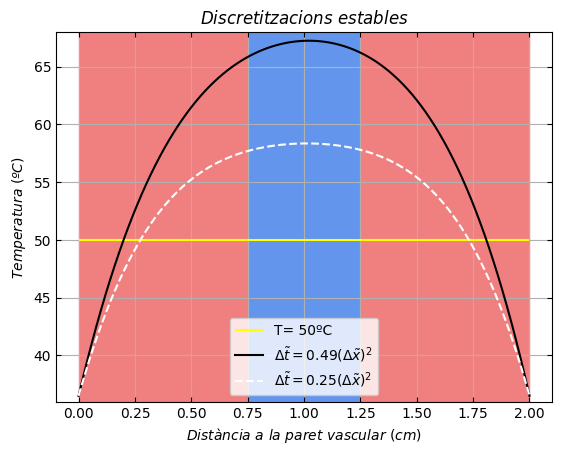

In [76]:
from matplotlib.lines import lineStyles
fig, ax= plt.subplots()

lim_inf_y= float(np.floor(np.min(ys_2)))
altura= float(np.floor(np.max(ys_2)+1)-np.floor(np.min(ys_2)))

rectangle_cor= pt.Rectangle((0.75, lim_inf_y), 0.5, altura, color="cornflowerblue", alpha=1)
rectangle_esq= pt.Rectangle((0, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)
rectangle_dre= pt.Rectangle((1.25, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)

ax.add_patch(rectangle_cor)
ax.add_patch(rectangle_esq)
ax.add_patch(rectangle_dre)

plt.title(r"$Discretitzacions\ estables$")
plt.xlabel(r"$Distància\ a\ la\ paret\ vascular\ (cm)$")
plt.ylabel(r"$Temperatura\ (ºC)$")

plt.ylim(lim_inf_y, np.floor(np.max(ys_2)+1))
plt.hlines(50, 0, 2, color="yellow", label="T= 50ºC")

plt.plot(dx_llista, ys_2, color="k", label=r"$\Delta \tilde{t}= 0.49(\Delta \tilde{x})^2$")
plt.plot(dx_llista, ys_3, color="white", label=r"$\Delta \tilde{t}= 0.25(\Delta \tilde{x})^2$", linestyle="--")
plt.legend()
plt.grid("equal")
plt.tick_params(direction="in", top=True, right=True)
plt.show()

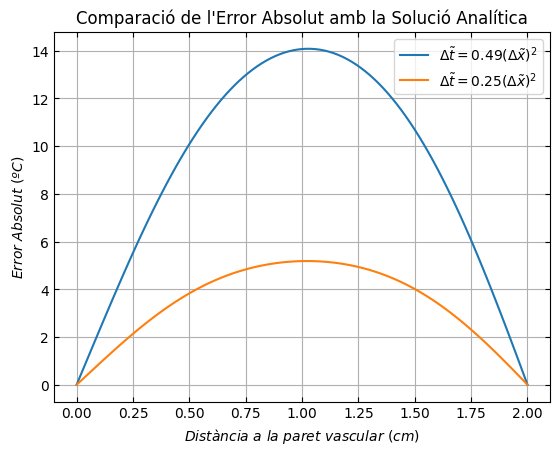

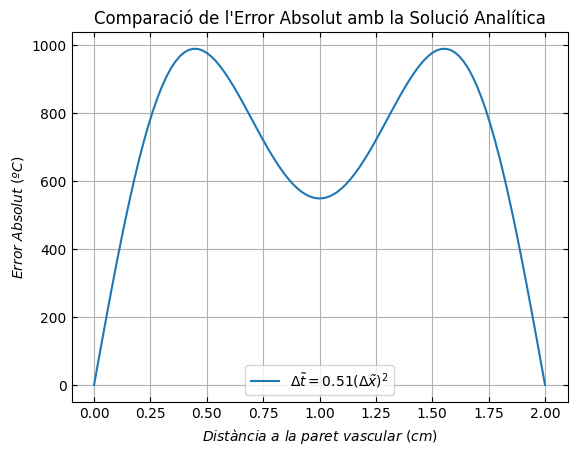

In [77]:
import numpy as np
import matplotlib.pyplot as plt

#COMPARACIÓ AMB LA SOLUCIÓ ANALÍTICA

T_real_analitica = np.array([36.5, 37.66969108, 38.77435843, 39.81640155, 40.79821064, 41.72216161,
 42.59061136, 43.40589333, 44.17031304, 44.88614393, 45.55562325, 46.18094826,
 46.76427258, 47.30770281, 47.81329543, 48.28305392, 48.71892617, 49.12280218,
 49.49651205, 49.84182427, 50.16044422, 50.45401308, 50.72410691, 50.97223607,
 51.19984485, 51.40831139, 51.59894779, 51.77300053, 51.93165095, 52.07601607,
 52.20714947, 52.32604233, 52.43362469, 52.53076667, 52.61827989, 52.69691893,
 52.76738279, 52.83031642, 52.88631225, 52.93591169, 52.97960659, 53.01784069,
 53.05101097, 53.07946891, 53.10352169, 53.12343327, 53.13942529, 53.15167798,
 53.16033077, 53.16548287, 53.16719365, 53.16548287, 53.16033077, 53.15167798,
 53.13942529, 53.12343327, 53.10352169, 53.07946891, 53.05101097, 53.01784069,
 52.97960659, 52.93591169, 52.88631225, 52.83031642, 52.76738279, 52.69691893,
 52.61827989, 52.53076667, 52.43362469, 52.32604233, 52.20714947, 52.07601607,
 51.93165095, 51.77300053, 51.59894779, 51.40831139, 51.19984485, 50.97223607,
 50.72410691, 50.45401308, 50.16044422, 49.84182427, 49.49651205, 49.12280218,
 48.71892617, 48.28305392, 47.81329543, 47.30770281, 46.76427258, 46.18094826,
 45.55562325, 44.88614393, 44.17031304, 43.40589333, 42.59061136, 41.72216161,
 40.79821064, 39.81640155, 38.77435843, 37.66969108, 36.5])
 # Solució analítica en ºC prèviament calculada

ys_1= np.squeeze(np.asarray(ys_1))  #Ho passem de matriu a array per poder restar-li la solució analítica
ys_2= np.squeeze(np.asarray(ys_2))
ys_3= np.squeeze(np.asarray(ys_3))

plt.figure()
plt.plot(dx_llista, np.abs(np.array(ys_2)-T_real_analitica), label=r"$\Delta\tilde{t}= 0.49(\Delta\tilde{x})^2$")
plt.plot(dx_llista, np.abs(np.array(ys_3)-T_real_analitica), label=r"$\Delta\tilde{t}= 0.25(\Delta\tilde{x})^2$")

plt.title("Comparació de l'Error Absolut amb la Solució Analítica")
plt.xlabel(r"$Distància\ a\ la\ paret\ vascular\ (cm)$")
plt.ylabel(r"$Error\ Absolut\ (ºC)$")
plt.legend()
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)
plt.show()

plt.figure()
plt.plot(dx_llista, np.abs(np.array(ys_1)-T_real_analitica), label=r"$\Delta\tilde{t}= 0.51(\Delta\tilde{x})^2$")
plt.title("Comparació de l'Error Absolut amb la Solució Analítica")
plt.xlabel(r"$Distància\ a\ la\ paret\ vascular\ (cm)$")
plt.ylabel(r"$Error\ Absolut\ (ºC)$")
plt.legend()
plt.tick_params(direction="in", top=True, right=True)
plt.grid(True)
plt.show()